<a href="https://colab.research.google.com/github/JoanWaweru/ML-Group-5-Tasks/blob/main/Housing_Price_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.linear_model import LassoCV
import numpy as np

Import Google drive where we have stored the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the housing price dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/modified_data.csv')

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


Prepare the dataset. 
First, we identify which feature is irrelevant and drop it. The most irrelevant feature is the column Id.

In [5]:
data.drop('Id', axis=1, inplace=True)

In [6]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


After dropping the Id column, check for the columns with missing data.

isnull().sum() returns a total count of missing values for each column and datatype.

In [7]:
data.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

Using SimpleImputer from sklearn library to fill in the missing values

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
data.LotFrontage=imputer.fit_transform(data['LotFrontage'].values.reshape(-1,1))[:,0]

In [9]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


The missing values have been filled in

In [10]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Retrieving the column that had missing values and confirming that the values have been filled

In [11]:
data.LotFrontage

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [12]:
initialFeatures=list(data.columns)
initialFeatures
len(initialFeatures)

76

In [13]:
features_missing_data = list(data.columns[data.isna().any()])
len(features_missing_data)

14

In [14]:
data.dropna(axis=1, thresh=0.5 * (len(data)), inplace=True)

In [15]:
mean_fill=['LotFrontage', 'MasVnrArea']
backward_fill_data = ['FireplaceQu']
forward_fill_data = list(set(features_missing_data)-set(mean_fill)-set(backward_fill_data))

In [16]:
forward_fill_data

['BsmtCond',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType2',
 'GarageQual',
 'Electrical',
 'GarageType',
 'MasVnrType',
 'GarageYrBlt',
 'GarageCond',
 'GarageFinish',
 'BsmtFinType1']

In [17]:
for a in mean_fill:
  data[a].fillna(data[a].mean(),inplace=True)

In [18]:
for b in backward_fill_data:
  data[b].fillna(method='bfill',inplace=True)

In [19]:
for c in forward_fill_data:
  data[c].fillna(method='ffill',inplace=True)

In [20]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

Encode the dataset to ensure that the model does not put weights to what does not need weighting.

First, list the data types entailed in each column.

In [21]:
data.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 76, dtype: object

Second, list all the non-numerical columns by extracting the categorical data.

In [22]:
categoricalFeatures = list(data.select_dtypes(include=['object']).copy().columns)

List the non-numerical columns.

In [23]:
categoricalFeatures

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [24]:
nominalData=['MSZoning', 'LandContour', 'LotConfig','Neighborhood','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','Foundation','BsmtFinType1','CentralAir']
ordinalData = list(set(categoricalFeatures)-set(nominalData))
numericalData = list(set(initialFeatures)-set(categoricalFeatures))
target = ['SalePrice']

In [25]:
data[numericalData]

,OverallQual,GarageArea,BsmtFullBath,YearBuilt,BsmtHalfBath,ScreenPorch,3SsnPorch,MasVnrArea,SalePrice,BsmtUnfSF,...,GrLivArea,BsmtFinSF2,OpenPorchSF,WoodDeckSF,HalfBath,GarageYrBlt,FullBath,1stFlrSF,2ndFlrSF,TotalBsmtSF
0,7,548,1,2003,0,0,0,196.0,208500,150,...,1710,0,61,0,1,2003.0,2,856,854,856
1,6,460,0,1976,1,0,0,0.0,181500,284,...,1262,0,0,298,0,1976.0,2,1262,0,1262
2,7,608,1,2001,0,0,0,162.0,223500,434,...,1786,0,42,0,1,2001.0,2,920,866,920
3,7,642,1,1915,0,0,0,0.0,140000,540,...,1717,0,35,0,0,1998.0,1,961,756,756
4,8,836,1,2000,0,0,0,350.0,250000,490,...,2198,0,84,192,1,2000.0,2,1145,1053,1145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,460,0,1999,0,0,0,0.0,175000,953,...,1647,0,40,0,1,1999.0,2,953,694,953
1456,6,500,1,1978,0,0,0,119.0,210000,589,...,2073,163,0,349,0,1978.0,2,2073,0,1542
1457,7,252,0,1941,0,0,0,0.0,266500,877,...,2340,0,60,0,0,1941.0,2,1188,1152,1152
1458,5,240,1,1950,0,0,0,0.0,142125,0,...,1078,1029,0,366,0,1950.0,1,1078,0,1078


Thirdly, we encode the ordinal data.

In [26]:
for feature in ordinalData:
 
  data[feature]=(data[feature].astype('category')).cat.codes

In [27]:
df_ordinal = data[ordinalData]

For nominal data, we will use One Hot Encoding.

In [28]:
df_nominal = pd.get_dummies(data[nominalData])

For the numerical data, there is no preprocessing taking place.

In [29]:
df_numerical = data[numericalData]

Join the data to form a new dataframe.

In [30]:
joinedData = pd.concat([df_numerical, df_nominal, df_ordinal], axis=1)

In [31]:
joinedData.head()

,OverallQual,GarageArea,BsmtFullBath,YearBuilt,BsmtHalfBath,ScreenPorch,3SsnPorch,MasVnrArea,SalePrice,BsmtUnfSF,...,BldgType,Heating,GarageType,KitchenQual,SaleCondition,GarageFinish,BsmtCond,BsmtFinType2,Utilities,GarageQual
0,7,548,1,2003,0,0,0,196.0,208500,150,...,0,1,1,2,4,1,3,5,0,4
1,6,460,0,1976,1,0,0,0.0,181500,284,...,0,1,1,3,4,1,3,5,0,4
2,7,608,1,2001,0,0,0,162.0,223500,434,...,0,1,1,2,4,1,3,5,0,4
3,7,642,1,1915,0,0,0,0.0,140000,540,...,0,1,5,2,0,2,1,5,0,4
4,8,836,1,2000,0,0,0,350.0,250000,490,...,0,1,1,2,4,1,3,5,0,4


Standardize the Encoded Dataset.

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
df_X = joinedData.drop('SalePrice', axis=1)
X = np.array(df_X)
df_X

,OverallQual,GarageArea,BsmtFullBath,YearBuilt,BsmtHalfBath,ScreenPorch,3SsnPorch,MasVnrArea,BsmtUnfSF,MiscVal,...,BldgType,Heating,GarageType,KitchenQual,SaleCondition,GarageFinish,BsmtCond,BsmtFinType2,Utilities,GarageQual
0,7,548,1,2003,0,0,0,196.0,150,0,...,0,1,1,2,4,1,3,5,0,4
1,6,460,0,1976,1,0,0,0.0,284,0,...,0,1,1,3,4,1,3,5,0,4
2,7,608,1,2001,0,0,0,162.0,434,0,...,0,1,1,2,4,1,3,5,0,4
3,7,642,1,1915,0,0,0,0.0,540,0,...,0,1,5,2,0,2,1,5,0,4
4,8,836,1,2000,0,0,0,350.0,490,0,...,0,1,1,2,4,1,3,5,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,460,0,1999,0,0,0,0.0,953,0,...,0,1,1,3,4,1,3,5,0,4
1456,6,500,1,1978,0,0,0,119.0,589,0,...,0,1,1,3,4,2,3,4,0,4
1457,7,252,0,1941,0,0,0,0.0,877,2500,...,0,1,1,2,4,1,1,5,0,4
1458,5,240,1,1950,0,0,0,0.0,0,0,...,0,1,1,2,4,2,3,4,0,4


In [34]:
df_y = data[target]
y = np.array(df_y)
df_y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [35]:
X.shape

(1460, 162)

In [36]:
y.shape

(1460, 1)

In [37]:
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [38]:
X

array([[ 0.65147924,  0.35100032,  1.10781015, ...,  0.310256  ,
        -0.02618016,  0.22722806],
       [-0.07183611, -0.06073101, -0.81996437, ...,  0.310256  ,
        -0.02618016,  0.22722806],
       [ 0.65147924,  0.63172623,  1.10781015, ...,  0.310256  ,
        -0.02618016,  0.22722806],
       ...,
       [ 0.65147924, -1.03391416, -0.81996437, ...,  0.310256  ,
        -0.02618016,  0.22722806],
       [-0.79515147, -1.09005935,  1.10781015, ..., -0.76825295,
        -0.02618016,  0.22722806],
       [-0.79515147, -0.9216238 ,  1.10781015, ..., -1.8467619 ,
        -0.02618016,  0.22722806]])

In [39]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

Feature Selection using L1

In [40]:
regressor = LassoCV()
regressor.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

Print the Regressor Coefficient

In [41]:
coef_col = pd.Series(regressor.coef_,index=df_X.columns)

Print the Column with Coefficients 

L1 selected only  77  features out of  162  from the transformed dataset 


Text(0.5, 1.0, 'Feature Selection Using L1 Embedder')

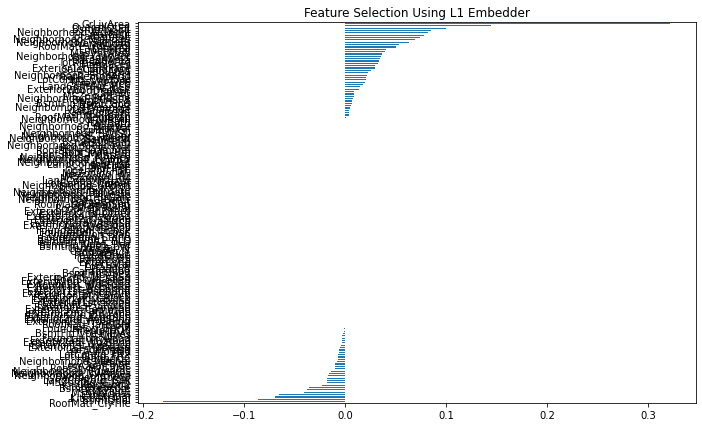

In [42]:
import matplotlib.pyplot as plt
sorted_coef = coef_col.sort_values()
plt.rcParams['figure.figsize']=(10.0,7.0)
sorted_coef.plot(kind="barh")

no_of_selected_features = sum(coef_col != 0)
no_of_rejected_features = sum(coef_col == 0)
total_features = no_of_selected_features + no_of_rejected_features
print("L1 selected only ",no_of_selected_features," features out of ",total_features," from the transformed dataset ")
plt.title("Feature Selection Using L1 Embedder")

The selected features will then be retrieved

In [43]:
selected_features_list = []
for label, value in zip(coef_col.index, coef_col.values):
    if value != 0:
        selected_features_list.append(label)

selected_features_list

['OverallQual',
 'GarageArea',
 'BsmtFullBath',
 'YearBuilt',
 'ScreenPorch',
 'MasVnrArea',
 'LotFrontage',
 'KitchenAbvGr',
 'BsmtFinSF1',
 'BedroomAbvGr',
 'MSSubClass',
 'Fireplaces',
 'LotArea',
 'OverallCond',
 'LowQualFinSF',
 'PoolArea',
 'MoSold',
 'GarageCars',
 'TotRmsAbvGrd',
 'YearRemodAdd',
 'YrSold',
 'GrLivArea',
 'BsmtFinSF2',
 'WoodDeckSF',
 'FullBath',
 'TotalBsmtSF',
 'MSZoning_C (all)',
 'MSZoning_FV',
 'LandContour_Bnk',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Mitchel',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'RoofStyle_Gable',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkFace',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',


In [44]:
df_standardized = pd.DataFrame(X, columns=df_X.columns)

In [46]:
X = df_standardized[selected_features_list]
X

,OverallQual,GarageArea,BsmtFullBath,YearBuilt,ScreenPorch,MasVnrArea,LotFrontage,KitchenAbvGr,BsmtFinSF1,BedroomAbvGr,...,Street,Functional,BsmtExposure,Condition2,BldgType,KitchenQual,SaleCondition,GarageFinish,BsmtCond,Utilities
0,0.651479,0.351000,1.107810,1.050994,-0.270208,0.511418,-0.229372,-0.211454,0.575425,0.163779,...,0.064238,0.255978,0.638078,-0.03174,-0.411691,-0.409369,0.208502,-0.227521,0.286468,-0.02618
1,-0.071836,-0.060731,-0.819964,0.156734,-0.270208,-0.574410,0.451936,-0.211454,1.171992,0.163779,...,0.064238,0.255978,-1.109753,-0.03174,-0.411691,0.795629,0.208502,-0.227521,0.286468,-0.02618
2,0.651479,0.631726,1.107810,0.984752,-0.270208,0.323060,-0.093110,-0.211454,0.092907,0.163779,...,0.064238,0.255978,-0.235838,-0.03174,-0.411691,-0.409369,0.208502,-0.227521,0.286468,-0.02618
3,0.651479,0.790804,1.107810,-1.863632,-0.270208,-0.574410,-0.456474,-0.211454,-0.499274,0.163779,...,0.064238,0.255978,0.638078,-0.03174,-0.411691,-0.409369,-3.426284,1.007349,-2.711695,-0.02618
4,1.374795,1.698485,1.107810,0.951632,-0.270208,1.364570,0.633618,-0.211454,0.463568,1.390023,...,0.064238,0.255978,-1.983669,-0.03174,-0.411691,-0.409369,0.208502,-0.227521,0.286468,-0.02618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,-0.060731,-0.819964,0.918511,-0.270208,-0.574410,-0.365633,-0.211454,-0.973018,0.163779,...,0.064238,0.255978,0.638078,-0.03174,-0.411691,0.795629,0.208502,-0.227521,0.286468,-0.02618
1456,-0.071836,0.126420,1.107810,0.222975,-0.270208,0.084843,0.679039,-0.211454,0.759659,0.163779,...,0.064238,-3.828474,0.638078,-0.03174,-0.411691,0.795629,0.208502,1.007349,0.286468,-0.02618
1457,0.651479,-1.033914,-0.819964,-1.002492,-0.270208,-0.574410,-0.183951,-0.211454,-0.369871,1.390023,...,0.064238,0.255978,0.638078,-0.03174,-0.411691,-0.409369,0.208502,-0.227521,-2.711695,-0.02618
1458,-0.795151,-1.090059,1.107810,-0.704406,-0.270208,-0.574410,-0.093110,-0.211454,-0.865548,-1.062465,...,0.064238,0.255978,-0.235838,-0.03174,-0.411691,-0.409369,0.208502,1.007349,0.286468,-0.02618


Feature Extraction using PCA

In [48]:
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=50)
p_components=svd.fit_transform(X)

In [49]:
np.shape(p_components)

(1460, 50)

In [50]:
svd.explained_variance_ratio_

array([0.1138924 , 0.04635534, 0.03792224, 0.03112819, 0.02694934,
       0.02313668, 0.0227184 , 0.02100618, 0.01959509, 0.0189368 ,
       0.01860719, 0.01842406, 0.01751093, 0.0173152 , 0.0169996 ,
       0.01638326, 0.01610021, 0.01596537, 0.01520267, 0.0149753 ,
       0.01489265, 0.01460975, 0.01419568, 0.01391309, 0.0137143 ,
       0.01358219, 0.01341215, 0.01297464, 0.01291207, 0.01272625,
       0.0123935 , 0.0122677 , 0.01205889, 0.0117869 , 0.01133984,
       0.01123886, 0.01096292, 0.0107465 , 0.0105985 , 0.01053353,
       0.01016717, 0.01000254, 0.00983636, 0.00956981, 0.00917845,
       0.00911906, 0.00900246, 0.00881956, 0.00877814, 0.00832826])

In [52]:
pcaNewData = pd.DataFrame(p_components)
targetNewData = pd.DataFrame(y,columns=['SalePrice'])
finalNewData = pd.concat([pcaNewData,targetNewData],axis=1)
finalNewData

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,SalePrice
0,1.892469,-0.786977,-0.101049,-0.736568,-0.639963,-0.780195,0.877964,-0.654101,-0.246488,0.401311,...,-0.079176,-0.429420,0.656700,-0.137742,-0.677650,-0.591525,-0.510166,0.000473,-0.154325,0.347273
1,0.452093,0.205996,1.654020,0.242168,-0.324652,0.288381,-3.171124,-2.592470,-0.616622,-1.414249,...,0.182773,-0.160010,-1.584232,-0.232813,0.815570,-1.253817,-0.772647,1.315550,-0.686240,0.007288
2,2.100255,-0.700055,0.210736,-0.457908,-0.568635,-0.764404,0.183921,-0.449147,-0.017723,-0.058617,...,0.509336,-0.566269,0.524711,0.060538,0.409779,-0.711355,-0.106149,-0.362910,-0.006690,0.536154
3,-1.839264,1.699222,-1.778921,1.882408,2.073557,-0.896029,-0.473586,-0.673582,1.796760,-0.509169,...,0.681028,-1.353590,-0.301204,0.563455,-0.963906,-0.340372,-0.548773,-1.251548,-0.595729,-0.515281
4,4.897355,1.226442,0.077286,-1.919585,-0.926187,-2.224553,1.060912,-1.275723,0.420934,0.628014,...,0.799545,-0.017248,0.216984,0.660561,1.826717,0.581606,0.733505,-1.656528,0.709633,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.067359,-0.353357,-1.246836,-0.805074,-1.257659,-0.061865,-0.416313,-0.075114,-0.803990,-0.338936,...,0.071894,-0.222330,-0.005861,0.635208,-0.288513,0.294904,-0.398566,-0.053010,-0.151394,-0.074560
1456,0.671241,2.816649,1.720490,-1.799980,0.447892,1.885459,-1.561290,-1.313347,-1.011012,-0.349692,...,0.976132,0.654973,-0.009181,-0.318174,-0.205592,0.589301,-0.254486,-0.185915,-0.205525,0.366161
1457,1.260861,1.680489,-2.832167,1.533480,0.678262,-1.118514,-1.534874,-1.871484,0.066969,-0.051762,...,0.282900,-2.005858,-0.410245,-0.794763,-0.632915,-0.147158,-1.364348,-1.151641,1.425085,1.077611
1458,-1.513557,-0.381526,2.616980,2.182320,0.257160,1.039542,-1.407563,0.318468,-1.114854,1.533265,...,0.626619,-0.988902,0.859923,-0.113277,-0.741306,0.832411,1.569420,-0.162967,0.129314,-0.488523


In [56]:
XPCA=p_components
XPCA

array([[ 1.89246874e+00, -7.86976811e-01, -1.01049230e-01, ...,
        -5.10166102e-01,  4.73288603e-04, -1.54325275e-01],
       [ 4.52093119e-01,  2.05995771e-01,  1.65402001e+00, ...,
        -7.72647255e-01,  1.31554977e+00, -6.86240089e-01],
       [ 2.10025453e+00, -7.00054786e-01,  2.10735602e-01, ...,
        -1.06148520e-01, -3.62909705e-01, -6.68952524e-03],
       ...,
       [ 1.26086103e+00,  1.68048927e+00, -2.83216688e+00, ...,
        -1.36434757e+00, -1.15164089e+00,  1.42508497e+00],
       [-1.51355665e+00, -3.81526097e-01,  2.61697979e+00, ...,
         1.56941989e+00, -1.62967080e-01,  1.29313612e-01],
       [-9.88565564e-01,  4.17924382e-01,  2.41544435e+00, ...,
         1.38140938e-01,  1.49647523e+00, -5.15531839e-01]])

In [55]:
y

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

Split the Dataset

In [57]:
y = pd.DataFrame(y, columns = df_y.columns)
y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [65]:
len(X_train)

1168

In [66]:
len(X_test)

292

In [59]:
X_train

array([[-2.00177415, -0.46382325,  1.85633973, ..., -0.5445183 ,
         0.71372365,  0.35378296],
       [-0.38927414,  2.28848923,  0.07684976, ...,  0.8899776 ,
         0.06440629, -0.13243208],
       [ 3.82918866, -2.30281934,  1.0534979 , ...,  1.27512123,
         1.17982308,  0.50221726],
       ...,
       [ 3.25668068, -1.45787792, -2.03634981, ...,  0.03660829,
         0.20043468,  0.63780016],
       [ 2.36354877, -0.10225091,  1.49769294, ..., -0.38811738,
         0.29438422,  0.01834336],
       [ 0.45200863,  2.10247793, -0.3962099 , ..., -1.04516057,
         0.46256702, -0.39470303]])

In [60]:
X_test

array([[-1.27608455,  0.39104769,  0.32209642, ..., -0.60717785,
         0.11929809,  0.26128206],
       [-0.1274646 ,  1.37581583,  1.93507378, ..., -0.10601339,
         0.16131297,  0.60581899],
       [-2.89197741,  1.77336282, -3.51583469, ..., -0.14810727,
         0.28292627, -0.49738027],
       ...,
       [ 2.03883047, -0.79656398,  2.78764671, ...,  2.06616599,
         0.90108781, -1.02981954],
       [ 0.46391846,  0.55035364, -0.74527075, ...,  1.52328899,
         0.71123779,  0.49295485],
       [-3.0513069 ,  0.06144824,  0.17581346, ..., -0.63768424,
        -2.09039392,  1.00394516]])

In [61]:
y_train

,SalePrice
1081,-0.603425
624,-0.198591
1405,1.184643
949,0.208761
363,-0.792306
...,...
820,0.026176
700,1.656845
283,0.801846
476,0.352310


In [62]:
y_test

,SalePrice
128,-0.326401
366,-0.276032
63,-0.515281
868,-0.150112
768,0.452253
...,...
1287,0.114321
1122,-0.867858
764,1.121683
72,0.051360


In [67]:
X_train.shape

(1168, 50)

Train the regression model using PCA with 2 components

In [70]:
from sklearn.linear_model import Ridge,LassoCV
regressor=LassoCV()
regressor.fit(XPCA,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1571: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV()

In [71]:
regressor.coef_

array([ 0.29480045,  0.08820672, -0.03174593,  0.04497854,  0.00307256,
       -0.04122619, -0.09363244, -0.03497495,  0.05733041,  0.00704192,
        0.05264231, -0.00795379, -0.00357092,  0.00511337, -0.00192307,
       -0.        ,  0.02050439, -0.0336024 ,  0.00120613,  0.        ,
        0.        , -0.        , -0.0250277 , -0.00744732, -0.03286202,
        0.01413579, -0.        ,  0.        , -0.03910645,  0.        ,
        0.04666087, -0.        , -0.00917966, -0.01903012, -0.03972956,
       -0.00192871, -0.04143949, -0.04363872,  0.0161736 ,  0.00942803,
       -0.01089095, -0.0925513 ,  0.01388027, -0.0254647 ,  0.        ,
       -0.03309672, -0.02062142, -0.02214869, -0.05386076,  0.02703409])

In [72]:
regressor.intercept_

4.573052371628093e-16

In [83]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()

In [84]:
# input layer
model.add(Dense(78, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation = 'relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation = 'relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation = 'sigmoid'))

# compile model
model.compile(loss='mse', optimizer='adam')

In [85]:
model.fit(X_train, y_train,
         validation_data=(X_test, y_test),
         epochs = 100,
         batch_size=256
         )

Epoch 1/100
5/5 [==============================] - 2s 77ms/step - loss: 1.2363 - val_loss: 1.1599
Epoch 2/100
5/5 [==============================] - 0s 15ms/step - loss: 1.0990 - val_loss: 1.0451
Epoch 3/100
5/5 [==============================] - 0s 20ms/step - loss: 0.9829 - val_loss: 0.9634
Epoch 4/100
5/5 [==============================] - 0s 14ms/step - loss: 0.8989 - val_loss: 0.8990
Epoch 5/100
5/5 [==============================] - 0s 15ms/step - loss: 0.8233 - val_loss: 0.8422
Epoch 6/100
5/5 [==============================] - 0s 17ms/step - loss: 0.7805 - val_loss: 0.7855
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.7438 - val_loss: 0.7369
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.7061 - val_loss: 0.7013
Epoch 9/100
5/5 [==============================] - 0s 19ms/step - loss: 0.6736 - val_loss: 0.6780
Epoch 10/100
5/5 [==============================] - 0s 18ms/step - loss: 0.6636 - val_loss: 0.6630
Epoch 11/100
5/5 [=

Evaluate the performance of the model

In [86]:
losses = pd.DataFrame(model.history.history)
losses

,loss,val_loss
0,1.236271,1.159935
1,1.099048,1.045056
2,0.982864,0.963427
3,0.898894,0.899046
4,0.823320,0.842218
...,...,...
95,0.563563,0.616237
96,0.564230,0.616127
97,0.561503,0.616037
98,0.562307,0.615941


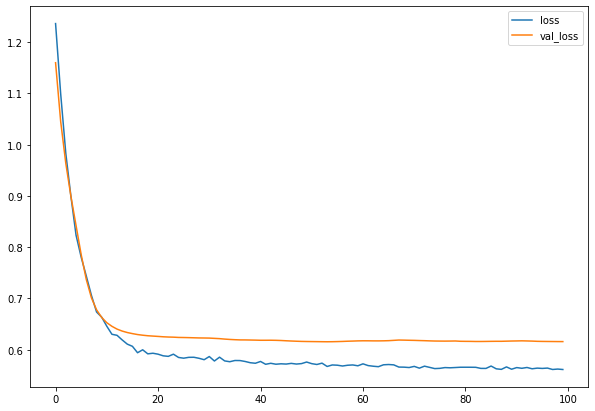

In [87]:
losses.plot()

In [88]:
y_hat = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
%matplotlib inline
mean_absolute_error(y_test,y_hat)

0.549287077905031

In [93]:
mean_squared_error(y_test, y_hat)

0.6159019890480669

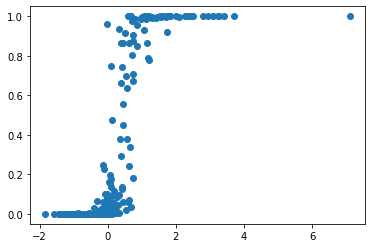

In [96]:
plt.scatter(y_test, y_hat)